# Munashe Chipanga R223842Y
# Ryan Nyakuyedzwa R223889K
# Cassie Musanhu R223939S

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Importing Datasets

In [2]:
dataset = pd.read_csv("penguins.csv")
X = dataset
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


## data cleaning

In [3]:
X = X.dropna()
X = X.drop_duplicates()

#removing outliers
z_scores = (X - X.mean())/X.std() 

X = X[(z_scores < 2) & (z_scores > -2)] #removing those above 3 and below -3

#Removing irrelevant features
variances = X.var() #calculate the variances for each feature
threshold = 0.15
features = X.columns[variances > threshold] #remove features with variance below threshold
X = X[features]

X

C:\Users\user\AppData\Local\Temp\ipykernel_13388\317411129.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = (X - X.mean())/X.std()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [4]:
X.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    1
body_mass_g          0
dtype: int64

In [5]:
mean_value = X['flipper_length_mm'].mean()
X['flipper_length_mm'].fillna(mean_value,inplace=True)

In [6]:
X.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

## Feature Scaling

In [7]:
scaler = StandardScaler()
X_original = X
X = scaler.fit_transform(X)
X

array([[-0.89772327,  0.77726336, -0.83001768, -0.57223347],
       [-0.82426521,  0.11703673, -0.61190131, -0.50992298],
       [-0.67734909,  0.42175671, -0.21929185, -1.19533834],
       ...,
       [ 1.17746691, -0.74633656,  0.95853655,  1.920186  ],
       [ 0.22251214, -1.20341653,  0.52230381,  1.23477065],
       [ 1.08564434, -0.5431899 ,  0.56592708,  1.4840126 ]])

## Choose the number of clusters

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


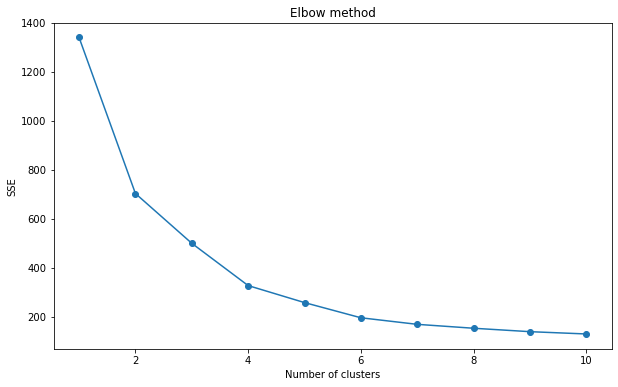

In [8]:
# Using the elbow method
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),sse,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow method")
plt.show()

## Training the model

In [10]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters,random_state=42)
y_kmeans = kmeans.fit_predict(X)

## Visualize the Clusters

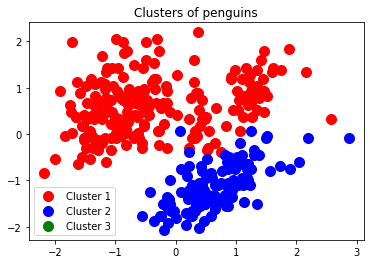

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of penguins')
plt.legend()
plt.show()

In [ ]:
##Done